# 2021 가을학기 기계학습 기말 프로젝트
학번 & 이름: 2019320098 김어진

# 1. 실험 내용에 대한 전체 요약

 * 본 프로젝트에서는 Mobile App Store data에 대해 genre가 game인지, 아닌지를 classify하는 최적의 model을 알아보고자 했다. 이를 위해 Decision Tree, KNN, Multilayer Perception(MLP) 세 개의 classification model을 사용하였고 parameter를 변경해가며 각각의 성능을 비교, 분석했다. 
  
* 데이터 전처리: 모델을 적용하기 전 data head, type을 출력해서 dataset이 어떻게 이루어져 있는지를 파악했다. onehot함수를 통해 genre_Games라는 새로운 feature를 만들어 주었다. data를 train, test set로 분리하고 z-score 정규화를 진행했다.
* feature selection: 일변량 통계 기법을 사용했다. 그러나 feature selection을 적용해도 성능에 변화가 없었기 때문에 feature selection을 적용하지 않은 버전으로 아래 실험을 진행했다.
* Decision Tree: 
default model에 대해서 성능을 실험한 후에 여러 가지 parameter를 변경해 가면서 가장 좋은 성능을 가지는 model을 찾아 보았다. 평가는 5-fold cross validation을 사용했다. 그 결과, min_impurity_decrease=0.0007 로 설정한 모델에서 최상의 성능이 나왔다.
* KNN: 
default model에 대해서 성능을 실험한 후에 여러 가지 parameter를 변경해 가면서 가장 좋은 성능을 가지는 model을 찾아 보았다. 평가는 5-fold cross validation을 사용했다. 그 결과, n_neighbors=200, p=1로 설정한 모델에서 최상의 성능이 나왔다.
* MLP: 
default model에 대해서 성능을 실험한 후에 여러 가지 parameter를 변경해 가면서 가장 좋은 성능을 가지는 model을 찾아 보았다. 평가는 5-fold cross validation을 사용했다. 그 결과,  hidden_layer_sizes=(1000,) 로 설정한 모델에서 최상의 성능이 나왔다.
* ensemble model: Random Forest를 가지고 실험해 보았다. 이 역시 default model에 대해서 성능을 실험한 후에 여러 가지 parameter를 변경해 가면서 가장 좋은 성능을 가지는 model을 찾아 보았다. 평가는 5-fold cross validation을 사용했다. 그 결과,  min_samples_leaf=4로 설정한 모델에서 최상의 성능이 나왔다.
* 종합적인 평가 결과, 최종 모델은 Random Forest(min_samples_leaf=4)로 결정하였다. 




# 2. 선정한 데이터에 대한 설명 및 데이터 URL

kaggle의 Mobile App Store (7200 apps) data를 사용했다. feature와 instance가 풍부하고 다양하기 때문에 본 데이터를 사용했다. 
17개의 feature, 약 7천개의 instance를 가지고 있는 dataset이다.
data url과 각 feature에 대한 설명은 아래와 같다.
* 데이터 url: https://www.kaggle.com/ramamet4/app-store-appledata-set-10k-apps 

    "id" : App ID
    "track_name": App Name
    "size_bytes": Size (in Bytes)
    "currency": Currency Type
    "price": Price amount
    "ratingcounttot": User Rating counts (for all version)
    "ratingcountver": User Rating counts (for current version)
    "user_rating" : Average User Rating value (for all version)
    "userratingver": Average User Rating value (for current version)
    "ver" : Latest version code
    "cont_rating": Content Rating
    "prime_genre": Primary Genre
    "sup_devices.num": Number of supporting devices
    "ipadSc_urls.num": Number of screenshots showed for display
    "lang.num": Number of supported languages
    "vpp_lic": Vpp Device Based Licensing Enabled

본 실험에서는 'size_bytes','price','rating_count_tot','user_rating', 'sup_devices.num','ipadSc_urls.num','lang.num','genre_Games' 이렇게 8개 항목의 feature를 선택했다. dataset을 게임인 것과 게임이 아닌 것으로 classify하는 모델을 만들고 싶었기 때문에 'genre_Games'는 onehot encoding을 통해 새로 만들어냈다.

# 3. 실험 설계 및 방법

* data URL을 통해서 classify할 data를 불러오고, data head와 type을 출력해서 dataset이 어떻게 구성되어 있는지를 파악한다.
* 어떤 feature에 대해 classify를 할 것인지를 결정한다. 여기에서는 장르가 game인지, 아닌지를 classify하려고 결정했다.
* one hot encoding을 사용해 genre_Games라는 새로운 feature를 생상한다. 1이면 게임 장르이고, 0이면 게임이 아닌 다른 장르의 app이라는 의미이다. 
* genre_Games를 포함해서 classify에 사용하고 싶은 8개의 feature를 선택한다. 
* data를 train, test set로 분리하고 z-score 정규화를 진행한다.
* feature selection (일변량 통계) 를 진행한다. feature selection을 했을 때 성능이 더 좋게 나오면 이때의 feature로 실험을 진행하고, 그렇지 않거나 변화가 없으면 원래의 특성으로 실험을 진행한다.
* Decision Tree에 대해 parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.
* Decision Tree에 대해 여러 종류의 parameter를 조작해서 model을 생성하고 훈련한다. 5-fold cross validation을 통해 이 model들의 성능을 검증하고, 가장 성능이 좋은 모델을 선정한다. 
* KNN, Multilayer Perception(MLP)에 대해서도 Decision Tree와 동일한 실험을 진행한다.
* Ensemble 기법으로 Random Forest를 사용한다. Random Forest에서도 동일한 실험을 진행한다. 
* 모든 모델의 성능을 종합해서 최상의 성능을 낸 모델을 선정한다. 이 모델에 대해 여러 가지 evaluation 기법을 사용해 평가, 분석해 본다. 

# 4. 실험 과정 (비교를 위해 시도한 trial 및 error)

## data 전처리

In [26]:
# apple store data를 load한다.
import pandas as pd
import matplotlib.pyplot as plt

data_url = "https://raw.githubusercontent.com/EojinK/datasets/master/AppleStore.csv"
df = pd.read_csv(data_url)
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [27]:
# data type을 확인한다.
df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [28]:
# 혹시 모를 na값을 drop하기 위해 사용한다.
df = df.dropna()

In [29]:
# genre에 대해 one-hot encoding을 한다.
onehot_df = pd.get_dummies(df.prime_genre,prefix="genre")
onehot_df.head()

,genre_Book,genre_Business,genre_Catalogs,genre_Education,genre_Entertainment,genre_Finance,genre_Food & Drink,genre_Games,genre_Health & Fitness,genre_Lifestyle,genre_Medical,genre_Music,genre_Navigation,genre_News,genre_Photo & Video,genre_Productivity,genre_Reference,genre_Shopping,genre_Social Networking,genre_Sports,genre_Travel,genre_Utilities,genre_Weather
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
# 위의 데이터를 원본과 병합한다.
df = pd.concat([df, onehot_df], axis=1)
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,genre_Book,genre_Business,genre_Catalogs,genre_Education,genre_Entertainment,genre_Finance,genre_Food & Drink,genre_Games,genre_Health & Fitness,genre_Lifestyle,genre_Medical,genre_Music,genre_Navigation,genre_News,genre_Photo & Video,genre_Productivity,genre_Reference,genre_Shopping,genre_Social Networking,genre_Sports,genre_Travel,genre_Utilities,genre_Weather
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
# 아래의 8개 feature들만 선택한다. 
data = df[['size_bytes','price','rating_count_tot','user_rating', 'sup_devices.num','ipadSc_urls.num','lang.num','genre_Games']]

data.describe()

,size_bytes,price,rating_count_tot,user_rating,sup_devices.num,ipadSc_urls.num,lang.num,genre_Games
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,3.526956,37.361817,3.707100,5.434903,0.536612
std,3.592069e+08,5.833006,7.573941e+04,1.517948,3.737715,1.986005,7.919593,0.498692
min,5.898240e+05,0.000000,0.000000e+00,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,3.500000,37.000000,3.000000,1.000000,0.000000
50%,9.715302e+07,0.000000,3.000000e+02,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,4.500000,38.000000,5.000000,8.000000,1.000000
max,4.025970e+09,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000,1.000000


In [32]:
# 데이터를 feature X와 label y로 분리한다.
y = data[['genre_Games']]
X = data.drop(columns=['genre_Games'])

# train data와 test data로 분리한다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [33]:
# training set에 대해서 Z-Score 정규화
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_norm = (X_train - X_train_mean)/X_train_std

In [34]:
# test set에 대해서 Z-Score 정규화
X_test_mean = X_test.mean()
X_test_std  = X_test.std()
X_test_norm = (X_test - X_test_mean)/X_test_std

## feature selection: 일변량 통계

In [35]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

# 고정된 난수를 발생시킨다.
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(data), 50))
# 데이터에 노이즈 특성을 추가한다. 
X_noise_ = np.hstack([data, noise])

In [36]:
# 원 데이터와 노이즈가 추가된 데이터의 크기를 비교한다.
print(data.shape)
print(X_noise_.shape)

(7197, 8)
(7197, 58)


In [37]:
# 데이터를 train/test셋으로 분리한다. 이때, random_state=42, test_size=0.2
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_noise_, y, random_state=42, test_size=0.2)

In [38]:
# f_classif(기본값)과 SelectPercentile을 사용하여 특성의 50%를 선택한다.
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train_, y_train_)

# 훈련 세트에 적용한다.
X_train_selected_ = select.transform(X_train_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [39]:
# shape가 어떻게 변화되었는지 확인한다. 특성이 58개에서 29개로 감소했다.
print("X_train.shape", X_train_.shape)
print("X_train_selected.shape", X_train_selected_.shape)

X_train.shape (5757, 58)
X_train_selected.shape (5757, 29)


In [40]:
# 어떤 특성이 선택되었는지 확인한다.
mask = select.get_support()
print(mask)

[ True  True False  True  True  True  True  True  True False  True False
  True False False  True  True  True  True False  True False False False
  True  True  True  True  True False  True  True False False False False
 False False  True False False False False False  True False False False
 False False False  True  True  True  True  True False False]


([<matplotlib.axis.YTick at 0x7f4114a0fbd0>],
 <a list of 1 Text major ticklabel objects>)

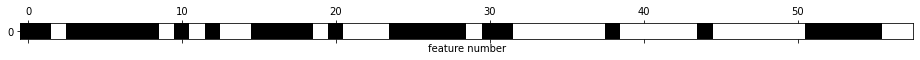

In [41]:
# 위 마스크를 시각화한다. 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거되었다.
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])

In [42]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터를 변환한다.
X_test_selected_ = select.transform(X_test_)

# LogisticRegression모델을 생성하고 원본 데이터에 훈련시킨 성능과 중요한 특성들이 선택된 데이터에 훈련시킨 성능을 비교한다.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_, y_train_)
print("전체 특성을 사용한 정확도", lr.score(X_test_, y_test_))
lr.fit(X_train_selected_, y_train_)
print("선택된 일부 특성을 사용한 정확도", lr.score(X_test_selected_, y_test_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


전체 특성을 사용한 정확도 0.53125
선택된 일부 특성을 사용한 정확도 0.53125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


dataset에서 특성이 많아지면 많아질수록 모델은 더 복잡해지고, 과적합될 가능성도 올라간다. 따라서 새로운 특성을 추가하거나 고차원의 dataset를 사용하게 될 때는 이 중에서 유용한 특성들만 선택하고 나머지는 배제하는 것이 성능에 보다 도움이 된다. 그러나 본 dataset의 경우는 feature selection을 적용했을 때 score의 변화가 없었다. 따라서 위의 서술에 해당하는, '모델이 지나치게 복잡하거나 과적합된 경우' 가 아님을 알 수 있었다. feature selection을 적용해도 그 의미가 없기 때문에,  이후의 실험에서는 feature selection을 적용하지 않은 상태로 실험을 진행했다. 

## Decision Tree

### Decision Tree default model
 * 모델 선정의 이유: 연속형, 범주형 데이터를 잘 분류하는 classifier model이기 때문에 decision tree를 선정했다. 
 * parameter를 조작하지 않은 default model을 생성하고 훈련한다. 성능을 검증하는 지표로는 5-fold cross validation을 사용했다.

In [43]:
# Decision tree default model
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import numpy as np

decTree = DecisionTreeClassifier(random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.7266182358411752


### Decision Tree model trial and error

여러 parameter를 변경시켜 실험해 보았다. random_state=42로 고정했다.

* criterion="entropy"
* default model과 비교하면 성능이 다소 떨어진다.

In [44]:
# criterion="entropy"
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(criterion="entropy",random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.7198682634258602


* splitter="random"
* default model과 비교하면 성능이 다소 떨어진다.

In [45]:
# splitter="random"
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(splitter="random",random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.7143148752384103


* max_depth = 5
* 숫자를 작게 할수록 score가 좋아지고 그 값은 5에서 최대이다. pruning의 효과로 보인다.

In [46]:
# max_depth = 5
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_depth = 5, random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.7812167998612883


* max_features = "auto"
* max_features를 auto, sqrt, log2값으로 변경해 보았으나 눈에 띄는 변화는 없었다.

In [47]:
# max_features = "auto"
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_features = "auto", random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.7260279235825412


* max_leaf_nodes=23
* 20 정도에서 좋은 값을 보여주어서 이를 기점으로 테스트했다. 
* 23일 때 score가 최대가 되고, 숫자가 커지면 score는 다시 줄어든다.

In [48]:
# max_leaf_nodes=23
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_leaf_nodes=23, random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.7816134282246496


* min_impurity_decrease=0.0007
* 0.001 정도 에서 좋은 값을 보여주어서 이를 기점으로 테스트했다. 
* 0.007일 때 score가 최대가 되고, 숫자가 커지면 다시 줄어든다.

In [49]:
# min_impurity_decrease=0.0007
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(min_impurity_decrease=0.0007, random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.7830036963477877


* 단일 parameter 변경 중 score가 0.78이상으로 나온 항목들을 mix해보았는데, 더 좋은 결과가 나오지는 않았다.

In [50]:
# mixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(min_impurity_decrease=0.0007, max_leaf_nodes=23, max_depth=5, random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.781613822291578


### Decision tree final model
실험 결과, min_impurity_decrease=0.0007 로 설정한 모델에서 최상의 성능이 나왔다.

In [51]:
# min_impurity_decrease=0.0007
# 0.001 정도 에서 좋은 값을 보여주어서 이를 기점으로 테스트했다. 
# 0.007일 때 score가 최대가 되고, 숫자가 커지면 다시 줄어든다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(min_impurity_decrease=0.0007, random_state=42)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)

print(np.mean(cv_results['test_score']))

0.7830036963477877


## KNN

### KNN default model
* 모델 선정의 이유: 간단하고 효율적이라는 장점 때문에 knn을 선정했다. 
* parameter를 조작하지 않은 default model을 생성하고 훈련한다. 성능을 검증하는 지표로는 5-fold cross validation을 사용했다.

In [52]:
# build and train KNN model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn import svm
import numpy as np

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
cv_results = cross_validate(knn, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5989732586182438


### KNN model trial and error

parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.

* n_neighbors=200
* 200 정도에서 좋은 값을 보여주었다.

In [53]:
# n_neighbors=200
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train)
cv_results = cross_validate(knn, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.654159770495421


* weights='distance'
* default model에서의 score값이 상당히 좋지 않았기 때문에 n_neighbors=200의 값으로 다른 parameter들을 테스트했다. 
* weights를 distance값으로 바꾸어 보았으나, 성능은 오히려 소폭 감소하였다.

In [54]:
# weights='distance'
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

knn = KNeighborsClassifier(n_neighbors=200, weights='distance')
knn.fit(X_train, y_train)
cv_results = cross_validate(knn, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6188214246307593


* algorithm='brute'
* algorithm을 'ball_tree', 'kd_tree', 'brute'로 바꾸어 보았으나 변화가 없었다. 

In [55]:
# algorithm='brute'
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

knn = KNeighborsClassifier(n_neighbors=200, weights='distance', algorithm='brute' )
knn.fit(X_train, y_train)
cv_results = cross_validate(knn, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6188214246307593


* p=1
* default model에서의 score값 상당히 좋지 않았기 때문에 n_neighbors=200의 값으로 다른 parameter들을 테스트했다. 
* p값을 1로 바꾸었을 때 성능이 소폭 상승했다.

In [56]:
# p=1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

knn = KNeighborsClassifier(n_neighbors=200, p=1)
knn.fit(X_train, y_train)
cv_results = cross_validate(knn, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6551522280544128


* leaf_size=10
* default model에서의 score값 상당히 좋지 않았기 때문에 n_neighbors=200의 값으로 다른 parameter들을 테스트했다. 
* leaf size에 여러 숫자를 넣어서 바꾸어 보았으나 변화가 없었다.

In [57]:
# leaf_size=10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

knn = KNeighborsClassifier(n_neighbors=200, leaf_size=10)
knn.fit(X_train, y_train)
cv_results = cross_validate(knn, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.654159770495421


* n_jobs=-1
* default model에서의 score값 상당히 좋지 않았기 때문에 n_neighbors=200의 값으로 다른 parameter들을 테스트했다. 
* n_jobs의 값을 -1로 변경해 보았으나 변화가 없었다.

In [58]:
# n_jobs=-1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

knn = KNeighborsClassifier(n_neighbors=200, n_jobs=-1)
knn.fit(X_train, y_train)
cv_results = cross_validate(knn, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.654159770495421


### KNN final model
실험 결과, n_neighbors=200, p=1 로 설정한 모델에서 최상의 성능이 나왔다. 

In [59]:
# p=1
# default model에서의 score값 상당히 좋지 않았기 때문에 n_neighbors=200의 값으로 다른 parameter들을 테스트했다. 
# p값을 1로 바꾸었을 때 성능이 소폭 상승했다.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np

knn = KNeighborsClassifier(n_neighbors=200, p=1)
knn.fit(X_train, y_train)
cv_results = cross_validate(knn, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6551522280544128


## MLP

### MLP default model
* 모델 선정의 이유: non-linear 상황에서도 유연하게 잘 동작한다는 특성 때문에 mlp를 선정했다.
* parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.

In [60]:
# MLP
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

0.5384158115414321


### MLP model trial and error
parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.

* hidden_layer_sizes=(1000,)
* 1000으로 늘렸을 때 성능에 소폭 상승이 있었으나 미미했고, 이 이상으로 늘리면 실행 시간이 너무 오래 걸려서 테스트하지 않았다. 

In [61]:
# hidden_layer_sizes=(1000,)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(1000,), random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

0.5402027080279315


* max_iter=1000
* default 값 200에서 늘이거나 줄여 보았으나, 성능의 향상은 없었다.

In [62]:
# max_iter=1000
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

0.5384158115414321


* activation='logistic'
* activation 값을 default relu값을 제외하고 identity, logistic, tanh으로 바꾸어 보았다. logistic에서 가장 좋은 성능이 나왔다.

In [63]:
# activation='logistic'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(random_state=42, activation='logistic')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

0.5400040982960546


* learning_rate='invscaling'
* learning rate를 invscaling, adaptive로 변경해 보았으나 성능의 상승은 없었다.

In [64]:
# learning_rate='invscaling'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(learning_rate='adaptive', random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

0.5384158115414321


* alpha=0.1
* alpha 값을 변경해 보았지만 변화는 없었다.

In [65]:
# alpha=0.1
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(alpha=0.0001, random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

0.5384158115414321


### MLP final model
실험 결과, hidden_layer_sizes=(1000,)으로 설정한 모델에서 최상의 성능이 나왔다. 

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(1000,), random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

0.5402027080279315


## Ensemble Model: Random Forest

### Random Forest default model
* 모델 선정의 이유: decision tree가 단일 모델로 가장 좋은 성능을 보였기 때문에 이를 이용한 random forest를 ensemble model로 설정했다. 
* parameter를 조작하지 않은 default model을 생성하고 훈련한다. 성능을 검증하는 지표로는 5-fold cross validation을 사용했다. default model이 decision tree보다 훨씬 좋은 성능을 보임을 확인할 수 있었다. 

In [67]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.7967036301445438


### Decision Tree model trial and error

여러 parameter를 변경시켜 실험해 보았다. random_state=42로 고정했다.

In [68]:
# n_estimators=1000
# 트리 개수를 늘렸을 때 더 좋은 성능을 보였다. 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7982927050330227


In [69]:
# max_depth=8
# max_depth는 8에서 좋은 성능을 보였다.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=8, random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8020643196040416


In [70]:
# min_samples_split=10
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(min_samples_split=10, random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8096093220472564


In [71]:
# min_samples_leaf=4
# 지금까지 테스트한 것 중 최고의 성능을 보여주었다.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(min_samples_leaf=4, random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8100091029460443


In [72]:
# max_leaf_nodes=100
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_leaf_nodes=100, random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8046462461184408


In [73]:
# min_samples_leaf=4, min_samples_split=10
# 좋은 성능을 보여 주었던 parameter를 함께 적용해 보았지만, 더 좋은 성능을 보여주지는 않았다.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(min_samples_leaf=4, min_samples_split=10, random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8082218123926168


### Random Forest final model
실험 결과, min_samples_leaf=4으로 설정한 모델에서 최상의 성능이 나왔다. 

In [74]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(min_samples_leaf=4, random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8100091029460443


# 5. 실험 결과 분석

실험 결과에 따라, 최종 모델을 random forest (min_samples_leaf=4)로 결정했다. 최종 모델에 대해 여러 가지 model evaluation 기법을 사용하여 평가해 보았다. 

In [75]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(min_samples_leaf=4, random_state=42)
forest.fit(X_train, y_train)
cv_results = cross_validate(forest, X_train, y_train.values.ravel(), cv=5)

print(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8100091029460443


In [76]:
y_pred = forest.predict(X_test)
y_prob = forest.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


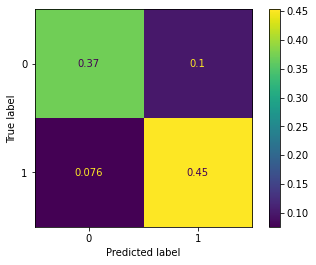

In [77]:
# confusion matrix를 시각화해서 출력해 보았다. 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(forest, X_test, y_test, normalize='all')

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

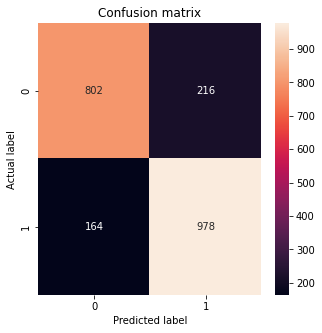

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
plot_cm(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


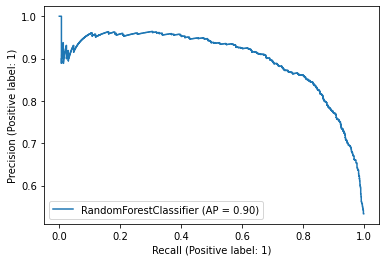

In [81]:
# precision_recall_curve를 출력해 보았다.
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(forest, X_test, y_test)

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([0,100])
  plt.ylim([0,100])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

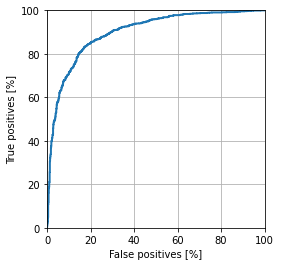

In [83]:
# roc curve를 출력해 보았다. 
plot_roc('Baseline classifieir', y_test, y_prob)

In [84]:
# roc_auc_score를 출력해 보았다. 
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob)

0.8989265893427929

In [85]:
# Confusion Matrix를 출력해 보았다. 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[802 216]
 [164 978]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1018
           1       0.82      0.86      0.84      1142

    accuracy                           0.82      2160
   macro avg       0.82      0.82      0.82      2160
weighted avg       0.82      0.82      0.82      2160



사실 본 실험에서 decision tree, random forest를 제외한 knn, mlp에서는 분류 모델이라고 하기 어려울 정도로 score가 낮게 나왔다. 0.5~0.6 정도의 매우 낮은 정확도를 보여주었는데, 이렇게까지 낮은 점수가 나올 수 있었던 것은 dataset에 장르가 game인 app과 game이 아닌 app이 거의 5: 5로 분포되어 있어서 가능한 것이라고 예상한다. 점수가 낮은 이유는 데이터의 분포가 knn, mlp로는 분류하기 어려운 형태로 되어 있어서라고 생각한다. 데이터가 decision tree계열의 모델에 잘 맞는 것은 데이터의 형식이 범주형으로 되어 있어서일 것이라고 생각한다.

# 결론
 본 실험에서는 apple store data에서 장르가 game인 것과 그렇지 않은 것을 분류하는 최적의 classification 모델을 선정하고자 했다. 이를 위해 전처리한 데이터에 Decision Tree, KNN, Multi Layer Perceptron, Random Forest등의 모델을 적용했고 그 성능을 비교했다. KNN과 MLP에서는 50-60% 정도의 별로 좋지 못한 성능을 보여주었고 Decision Tree나 Random Forest에서는 그보다 나은 75-81% 정도의 성능을 보여주었다. parameter를 조절해서 확인한 결과 최상의 성능은 min_samples_leaf=4로 parameter를 변경한 Random Forest에서 나타났으며, accuracy는 약 81%정도로 확인되었다. dataset이 범주형으로 분포되어 있기 때문에 decision tree계열의 model에서 비교적 좋은 점수가 나온 것으로 추측된다. 이를 통해 apple store data를 가장 잘 분류하는 모델은 Random Forest(min_samples_leaf=4) 라고 결론지었다.  
